In [1]:
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc_context, rcParams

In [2]:
arial_tff = '/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf'

https://stackoverflow.com/a/60390860/9609769

https://scentellegher.github.io/visualization/2018/05/02/custom-fonts-matplotlib.html

In [3]:
from matplotlib import font_manager as fm

In [4]:
font_files = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [5]:
# {f.name for f in matplotlib.font_manager.fontManager.ttflist}

In [6]:
rcParams['font.family'] = ['Arial']

In [7]:
import matplotlib

import screenpro

from screenpro.load import loadScreenProcessingData, read_adata_pkl

### Get phenotype scores

In [8]:
Ci_adata = read_adata_pkl('datasets/CRISPRi')
Ca_A549_adata = read_adata_pkl('datasets/CRISPRa_A549')
Ca_k562_adata = read_adata_pkl('datasets/CRISPRa_k562')

In [9]:
Ci_adata.comparisons

{'PARPi': 'rho1',
 'DNAPKi': 'rho2',
 'ATMi': 'rho3',
 'ATRi': 'rho4',
 'WEE1i': 'rho5',
 'PARPi+DNAPKi': 'rho6',
 'PARPi+ATMi': 'rho7',
 'PARPi+ATRi': 'rho8',
 'PARPi+WEE1i': 'rho9'}

## sgRNA level phenotypes

In [10]:
Ci_pdata = ad.AnnData(
    X = Ci_adata.obsm['phenotypes'].T,
    var = Ci_adata.obs
)

for k,v in Ci_adata.comparisons.items():
    Ci_pdata.obs.index = Ci_pdata.obs.index.str.replace(v,k)


Ci_pdata = Ci_pdata[:,Ci_pdata.to_df().isna().sum(axis=0).eq(0)]
Ci_pdata.obs = pd.DataFrame(list(Ci_pdata.obs.index.str.split(' ')), columns = ['score','replicate'],index=Ci_pdata.obs.index,dtype=str)
Ci_pdata.obs.score = pd.Categorical(
    Ci_pdata.obs.score,
    categories=['gamma',
                'PARPi',
                'DNAPKi',
                'PARPi+DNAPKi',
                'ATMi',
                'PARPi+ATMi',
                'ATRi',
                'PARPi+ATRi',
                'WEE1i',
                'PARPi+WEE1i'
               ]
)

Ci_pdata

AnnData object with n_obs × n_vars = 30 × 97228
    obs: 'score', 'replicate'
    var: 'sublibrary', 'gene', 'transcripts', 'sequence'

only keep `ave` scores:

In [11]:
Ci_pdata_ave = Ci_pdata[Ci_pdata.obs.index.str.contains('ave'),].copy()

In [12]:
Ci_pdata_ave

AnnData object with n_obs × n_vars = 10 × 97228
    obs: 'score', 'replicate'
    var: 'sublibrary', 'gene', 'transcripts', 'sequence'

### PCA (1)

In [13]:
sc.tl.pca(Ci_pdata_ave, svd_solver='arpack')

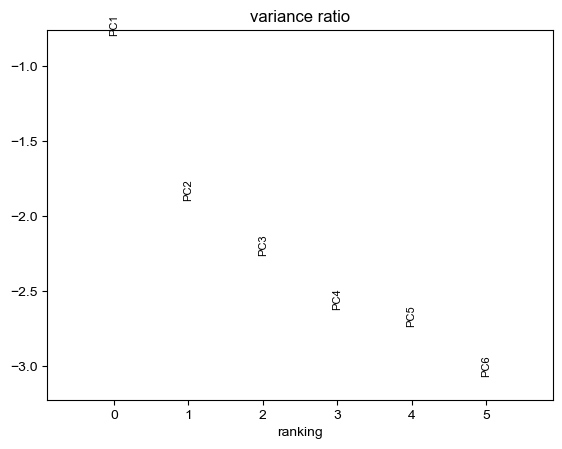

In [33]:
sc.pl.pca_variance_ratio(Ci_pdata_ave, log=True, n_pcs=5) # scanpy generates the filename automatically

In [15]:
Ci_pdata_ave.obs['treatment'] = 'ctrl'
Ci_pdata_ave.obs.loc[Ci_pdata_ave.obs.score.str.contains('i'),'treatment'] = 'mono'
Ci_pdata_ave.obs.loc[Ci_pdata_ave.obs.score.str.contains('i\+'),'treatment'] = 'combo'
Ci_pdata_ave.obs['treatment'] = pd.Categorical(Ci_pdata_ave.obs['treatment'],categories=['ctrl','mono','combo'])

In [16]:
arial_tff

'/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf'

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


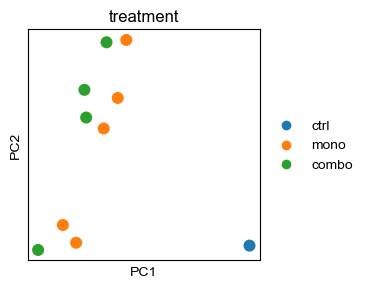

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


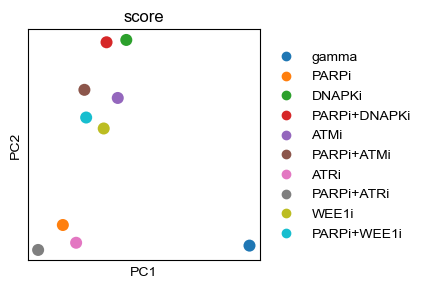

In [17]:
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.pca(
        Ci_pdata_ave,
        size=300,
        color=['treatment'],
    )  # plot the pca results with color as mouse.id 
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.pca(
        Ci_pdata_ave,
        size=300,
        color=['score'],
    )  # plot the pca results with color as mouse.id 

### PCA (2)

let's skip `gamma` and redo the PCA

In [18]:
Ci_pdata_ave_rho = Ci_pdata_ave[~Ci_pdata_ave.obs.score.eq('gamma'),:].copy()

In [19]:
sc.tl.pca(Ci_pdata_ave_rho, svd_solver='arpack')

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


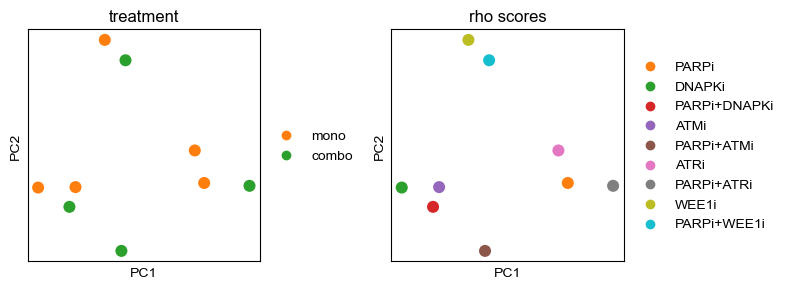

In [113]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (8, 3))

sc.pl.pca(
    Ci_pdata_ave_rho,
    size=300,
    color=['treatment'],
    show=False,
    ax=ax1
) 

sc.pl.pca(
    Ci_pdata_ave_rho,
    size=300,
    color=['score'],
    title = 'rho scores',
    show=False,
    ax=ax2
)  

plt.tight_layout()
plt.savefig('PCA_plots.pdf')
plt.show()

### PCA (3)

In [64]:
pca = pd.concat([
    pd.DataFrame(
        Ci_pdata_ave_rho.obsm['X_pca'][:,[0,1]],
        index=Ci_pdata_ave_rho.obs.index,
        columns=['PC-1','PC-2']
    ),
    Ci_pdata_ave_rho.obs.drop('replicate',axis=1)
],axis=1)

In [76]:
pca

,PC-1,PC-2,score,treatment
PARPi ave_rep1_rep2,38.535702,-8.424231,PARPi,mono
DNAPKi ave_rep1_rep2,-49.478687,-10.204838,DNAPKi,mono
ATMi ave_rep1_rep2,-29.665228,-10.026471,ATMi,mono
ATRi ave_rep1_rep2,33.561359,4.219633,ATRi,mono
WEE1i ave_rep1_rep2,-14.130200,47.211475,WEE1i,mono
PARPi+DNAPKi ave_rep1_rep2,-32.888412,-17.701326,PARPi+DNAPKi,combo
PARPi+ATMi ave_rep1_rep2,-5.336707,-34.832546,PARPi+ATMi,combo
PARPi+ATRi ave_rep1_rep2,62.561489,-9.529382,PARPi+ATRi,combo
PARPi+WEE1i ave_rep1_rep2,-3.159315,39.287689,PARPi+WEE1i,combo


In [167]:
from plotnine import *

In [425]:
pca_p =  (ggplot(pca) 
 + geom_point(aes(
     x = 'PC-1',
     y = 'PC-2',
     fill='score', 
     shape = 'treatment'
 ), color='black', size = 8)
 + geom_text(aes(
     x = 'PC-1',
     y = 'PC-2',
     label = 'score',
     size = 3
 ),
     nudge_y = 3,
     nudge_x = 7,
            )
 + theme_classic()
 + theme(
     panel_grid_major   = element_blank(), 
     panel_grid_minor   = element_blank(), 
     panel_background   = element_blank(), 
     
     legend_background  = element_blank(), 
     legend_position    = 'top',
     legend_direction   = 'horizontal', # affected by the ncol=2
     legend_text_legend = element_text(size=8),
     
     axis_line          = element_line(size=2),
     axis_text_x        = element_text(size=8),
     axis_text_y        = element_text(size=8),
     axis_title_x       = element_text(weight='bold', size=12),
     axis_title_y       = element_text(weight='bold', size=12),
     
     text               = element_text(font = 'arial'),

     figure_size        = (4.5, 5)
 )
 + xlim(-60,80)
 # + ylim(-30,60)
          # + scale_color_discrete(guide=False)

)

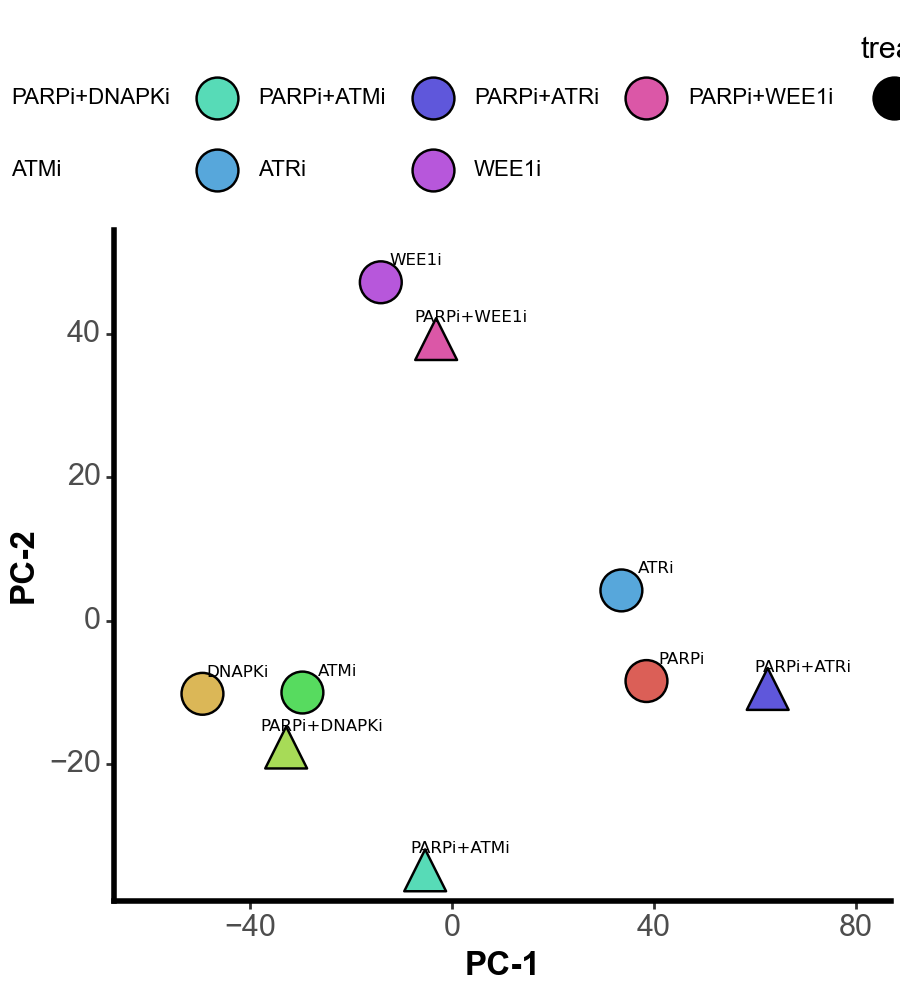

<Figure Size: (450 x 500)>

In [426]:
pca_p

In [417]:
pca_p.save('PCA_ggplot.pdf')

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4.5 x 5 in image.
/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: PCA_ggplot.pdf


### Correlation plot

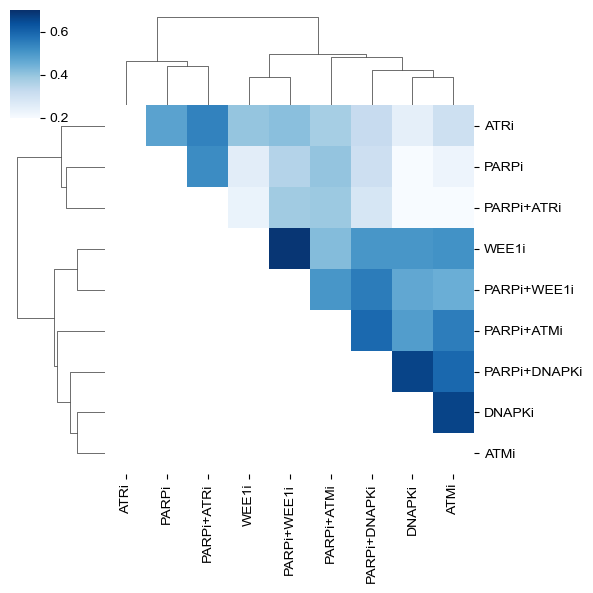

In [32]:
df = Ci_pdata_ave_rho.to_df().T
df.columns = df.columns.str.split(' ').str[0]

corr = df.corr()

g = sns.clustermap(corr, 
                   method = 'complete', 
                   # cmap   = 'rocket_r', 
                   cmap    = 'Blues', 
                   # annot   = True, 
                   vmin    = 0.2,
                   vmax    = 0.7,
                   annot_kws = {'size': 10},
                   figsize=(6, 6)
                  )
mask = np.tril(np.ones_like(corr))

values = g.ax_heatmap.collections[0].get_array().reshape(corr.shape)
new_values = np.ma.array(values, mask=mask)
g.ax_heatmap.collections[0].set_array(new_values)

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90);

g.savefig("corr.pdf",transparent=True) 

## 

### gene corr!

___
    Mon Jul 17 17:32:12 PDT 2023

I need to fix this https://github.com/abearab/ScreenPro2/issues/9

In [22]:
def get_annotated_score_df(adata,score,level):
    if level == 'transcript':
        df = adata.transcript_scores[score]['ave_rep1_rep2'][[
            'average phenotype of strongest 3',
            'Mann-Whitney p-value',
        ]].reset_index('gene').reset_index(drop=True).copy()
    
    elif level == 'gene':
        df = adata.gene_scores[score]['ave_rep1_rep2'][[
            'average phenotype of strongest 3',
            'Mann-Whitney p-value',
        ]].reset_index('gene').copy()
        
    df = screenpro.phenoScore.ann_score_df(df, ctrl_label='pseudo')
    
    return df

In [23]:
screenpro.phenoScore.ann_score_df

<function screenpro.phenoScore.ann_score_df(df_in, up_hit='resistance_hit', down_hit='sensitivity_hit', ctrl_label='non-targeting', threshold=10)>

In [24]:
rho_df = pd.concat(dict([
    (treat,get_annotated_score_df(Ci_adata,score,'gene').set_index('target')) for treat, score in Ci_adata.comparisons.items()
]),axis=1)

In [25]:
rho_df.to_csv('all_rho_scores_with_hit_labels.csv')

# 

In [26]:
from watermark import watermark
print(
    watermark()
)
print('_'*80)
print(
    watermark(iversions=True, globals_=globals())
)

Last updated: 2023-07-18T18:13:22.685272-07:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.14.0

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 3.10.0-957.27.2.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

________________________________________________________________________________
numpy     : 1.24.4
scanpy    : 1.9.3
screenpro : 0.2.1
matplotlib: 3.7.2
anndata   : 0.9.1
seaborn   : 0.12.2
pandas    : 2.0.3

